In [69]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.datasets.samples_generator import make_classification
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn.learning_curve import validation_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.learning_curve import learning_curve
from sklearn.svm import SVR


In [368]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd
import multiprocessing as mp
import time
import pickle
import os

# global variable path
MY_PATH = 'E:/pythondata/'
FILE_HEADER = 'Num_10'

file_name = (MY_PATH + FILE_HEADER + 'ba_Xy')
with open(file_name, 'rb') as file:
    mylist = pickle.load(file)
    
file_name = (MY_PATH + FILE_HEADER + 'ba_full_Xy')
with open(file_name, 'rb') as file:
    mylist_full = pickle.load(file)

ba_X = mylist[0]
ba_y = mylist[1]
ba_full_X = mylist_full[0]
ba_full_y = mylist_full[1]

In [51]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression

In [52]:
model = LinearRegression()
model.fit(ba_X, ba_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
print(model.coef_)

[  0.          0.        130.47946    65.51789     4.0502973 -11.236782
   5.734815   66.53881   139.37619     0.          0.       ]


In [54]:
print(model.intercept_)  # 和y轴交点



61.862343


In [55]:
print(model.get_params)

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)>


In [58]:
print(model.score(ba_X, ba_y))

0.9729306955994644


In [44]:
Num_thread = 4
Num_iteration = 200


list_X = list()
list_y = list()
for index in range(Num_thread):

    file_name = MY_PATH + FILE_HEADER + '_th_' + str(index)
    with open(file_name, 'rb') as File:
        mylist = pickle.load(File)
    mylist_1 = mylist[0]
    mylist_2 = mylist[1]
    for iIteration in range(Num_iteration):
        list_X.append(mylist_1[iInd])
        v_root = mylist_2[iInd]
        myenergy = np.sum(v_root ** 2)
        list_y.append(myenergy)

ba_X = np.array(list_X)
ba_y = np.array(list_y)

NameError: name 'iInd' is not defined

In [60]:
from sklearn import preprocessing
import numpy as np

In [62]:
ba_scale_X = preprocessing.scale(ba_X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:164: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:181: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn("Numerical issues were encountered "


In [64]:
model.fit(ba_X, ba_y)
print(model.score(ba_X, ba_y))

0.9729306955994644


In [65]:
model.fit(ba_scale_X, ba_y)
print(model.score(ba_scale_X, ba_y))

0.972930692169734


In [72]:
X_train,X_test,y_train,y_test = train_test_split(ba_X, ba_y ,test_size=.3)

In [76]:
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.2358529781959311


In [73]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_lin = SVR(kernel='linear', C=1e3)
svr_poly = SVR(kernel='poly', C=1e3, degree=2)

In [84]:
svr_rbf.fit(X_train, y_train)
print(svr_rbf.score(X_train, y_train))
print(svr_rbf.score(X_test, y_test))

0.9991945890237004
0.9993929316048465


In [80]:
svr_lin.fit(X_train, y_train)
print(svr_lin.score(X_test, y_test))

0.929479999835668


In [81]:
svr_poly.fit(X_train, y_train)
print(svr_poly.score(X_test, y_test))

0.976316819125835


In [89]:
for name, estimator in {"SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items():
    print(estimator)


SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


In [90]:
svr_rbf.fit(X_train, y_train)
print(svr_rbf.score(X_train, y_train))
print(svr_rbf.score(X_test, y_test))

0.9991945890237004
0.9993929316048465


In [94]:
from sklearn.cross_validation import cross_val_score
scores = cross_val_score(svr_rbf, ba_X, ba_y, cv=5)
print(scores.mean())

0.997834642259658


In [99]:
{"SVR": SVR(kernel='rbf', C=1e1, gamma=10)}.items()

dict_items([('SVR', SVR(C=10.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))])

In [101]:
np.logspace(0, 4, 8)

array([1.00000000e+00, 3.72759372e+00, 1.38949549e+01, 5.17947468e+01,
       1.93069773e+02, 7.19685673e+02, 2.68269580e+03, 1.00000000e+04])

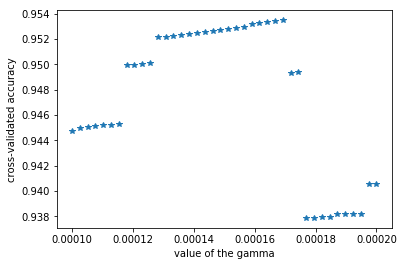

In [297]:
# gamma_range = np.logspace(-1.5, 0, 28)
gamma_range = np.linspace(1e-4, 2e-4, 40)
g_score = []
for gamma in gamma_range:
    svr_rbf = SVR(kernel='rbf', C=1e6, gamma=gamma)
    scores = cross_val_score(svr_rbf, ba_X, ba_y, cv=5) # , scoring='mean_squared_error')
    # print('gamma=' + str(gamma))
    # print('score=' + str(scores.mean()))
    g_score.append(scores.mean())
plt.plot(gamma_range, g_score, '*')
plt.xlabel('value of the gamma')
plt.ylabel('cross-validated accuracy')
plt.show()

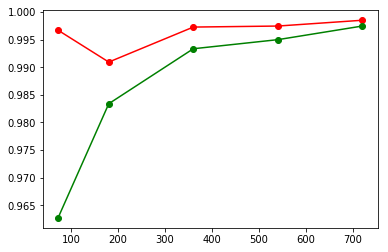

In [135]:
param_range=np.logspace(-6,-2.3,5)
#gamma 值是重要的。取0.001就很好。
train_sizes,train_loss,test_loss=learning_curve(
    SVR(gamma=0.05, C=1e3),ba_X,ba_y,cv=10,  #scoring='mean_squared_error',
    train_sizes=[0.1,0.25,0.5,0.75,1])
train_loss_mean = np.mean(train_loss, axis=1)
test_loss_mean = np.mean(test_loss, axis=1)

plt.plot(train_sizes, train_loss_mean, 'o-', color='r', label='Training')
plt.plot(train_sizes, test_loss_mean, 'o-', color='g', label='Testing')

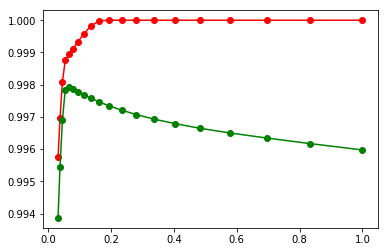

In [144]:
param_range=np.logspace(-1.5,0,20)
#gamma 值是重要的。取0.001就很好。
train_loss,test_loss=validation_curve(
    SVR(C=1e3),ba_X,ba_y,param_name = 'gamma', param_range=param_range, cv=10) #scoring='mean_squared_error'
train_loss_mean = np.mean(train_loss, axis=1)
test_loss_mean = np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color='r', label='gamma')
plt.plot(param_range, test_loss_mean, 'o-', color='g', label='loss')

In [147]:
print(__doc__)

import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.datasets import load_digits
from sklearn.ensemble import RandomForestClassifier

svr_rbf = SVR(kernel='rbf')
# svr_lin = SVR(kernel='linear', C=1e3)
# svr_poly = SVR(kernel='poly', C=1e3, degree=2)

Automatically created module for IPython interactive environment


In [150]:
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [181]:
# use a full grid over all parameters
param_grid = {"C": list(np.logspace(3,4,2)),
              "gamma": list(np.logspace(-2,-1,2))}

# run grid search
grid_search = GridSearchCV(svr_rbf, param_grid=param_grid)
start = time()
grid_search.fit(ba_X, ba_y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
# report(grid_search.cv_results_)
#report(y_test - grid_search.predict(X_test))

GridSearchCV took 0.22 seconds for 4 candidate parameter settings.


In [199]:
grid_search.score(X_test, y_test)

0.9999979243564893

In [168]:
grid_search.cv_results_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\util

{'mean_fit_time': array([0.01013414, 0.01232576, 0.01711988, 0.01066089]),
 'std_fit_time': array([0.00210047, 0.00339826, 0.00489846, 0.00094122]),
 'mean_score_time': array([0.00233213, 0.00033355, 0.00166599, 0.        ]),
 'std_score_time': array([0.00047176, 0.00047171, 0.00047064, 0.        ]),
 'param_C': masked_array(data=[1000.0, 1000.0, 10000.0, 10000.0],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_gamma': masked_array(data=[0.01, 0.1, 0.01, 0.1],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1000.0, 'gamma': 0.01},
  {'C': 1000.0, 'gamma': 0.1},
  {'C': 10000.0, 'gamma': 0.01},
  {'C': 10000.0, 'gamma': 0.1}],
 'split0_test_score': array([0.96499323, 0.99882631, 0.99318052, 0.99883886]),
 'split1_test_score': array([0.98052207, 0.99968433, 0.99706072, 0.99969948]),
 'split2_test_score': array([0.96918396, 0.9951716 , 0.98862436, 0.99517163

In [169]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.5, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(SVC(), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for precision

Best parameters set found on development set:

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

Grid scores on development set:

0.986 (+/-0.016) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
0.959 (+/-0.029) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.026) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.988 (+/-0.017) for {'C': 1000, 'gamma': 0.001, 'kernel': 'rbf'}
0.982 (+/-0.025) for {'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}
0.975 (+/-0.014) for {'C': 1, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 10, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 100, 'kernel': 'linear'}
0.975 (+/-0.014) for {'C': 1000, 'kernel': 'linear'}

Detailed classification report:

The model 

In [173]:
from __future__ import print_function

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC

print(__doc__)

# Loading the Digits dataset
digits = datasets.load_digits()

# To apply an classifier on this data, we need to flatten the image, to
# turn the data in a (samples, feature) matrix:
n_samples = len(digits.images)
X = digits.images.reshape((n_samples, -1))
y = digits.target

# Split the dataset in two equal parts
X_train, X_test, y_train, y_test = train_test_split(
    ba_X, ba_y, test_size=0.3, random_state=0)

# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-1, 1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

# scores = ['precision', 'recall']


print("# Tuning hyper-parameters for %s")
print()

clf = GridSearchCV(SVR(), tuned_parameters, cv=5)
clf.fit(X_train, y_train)

print("Best parameters set found on development set:")
print()
print(clf.best_params_)
print()
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
print()

print("Detailed classification report:")
print()
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")
print()
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))
print()

# Note the problem is too easy: the hyperparameter plateau is too flat and the
# output model is the same for precision and recall with ties in quality.

Automatically created module for IPython interactive environment
# Tuning hyper-parameters for %s

Best parameters set found on development set:

{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}

Grid scores on development set:

0.209 (+/-0.029) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.002 (+/-0.012) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
-0.025 (+/-0.014) for {'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}
-0.028 (+/-0.014) for {'C': 1, 'gamma': 0.0001, 'kernel': 'rbf'}
0.656 (+/-0.062) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.243 (+/-0.033) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.003 (+/-0.012) for {'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}
-0.025 (+/-0.014) for {'C': 10, 'gamma': 0.0001, 'kernel': 'rbf'}
0.984 (+/-0.022) for {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
0.682 (+/-0.048) for {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
0.246 (+/-0.033) for {'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
0.003 (+/-0.012) for {'C': 100, 'gamma': 0.0001, 'kernel': 'rbf'}
0.997 (+/-0.

ValueError: Unknown label type: (array([189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 145.18632691,
       189.42749548, 189.42749548, 145.18632691, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
        47.88615752, 297.82921407, 189.42749548, 440.08824341,
       189.42749548, 145.18632691, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       145.18632691,  47.88615752, 189.42749548, 189.42749548,
       145.18632691, 189.42749548, 189.42749548, 145.18632691,
        47.88615752, 189.42749548, 189.42749548, 189.42749548,
       145.18632691, 189.42749548, 189.42749548, 189.42749548,
       145.18632691, 189.42749548,  47.88615752,  47.88615752,
       189.42749548, 189.42749548, 189.42749548,  47.88615752,
       189.42749548, 189.42749548, 189.42749548,  47.88615752,
       189.42749548, 145.18632691, 145.18632691, 145.18632691,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 297.82921407,  47.88615752,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548,  47.88615752,
       297.82921407, 145.18632691, 189.42749548,  47.88615752,
       145.18632691, 189.42749548, 189.42749548, 200.90421895,
       189.42749548, 128.0408849 , 189.42749548, 189.42749548,
       145.18632691, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 145.18632691, 189.42749548, 189.42749548,
       359.74124048, 189.42749548, 189.42749548, 145.18632691,
       189.42749548, 189.42749548,  33.54856511, 189.42749548,
        47.88615752, 189.42749548, 189.42749548,  47.88615752,
       440.08824341,  47.88615752, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 440.08824341, 145.18632691,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548,  47.88615752, 189.42749548,
       189.42749548, 189.42749548,  47.88615752, 189.42749548,
        47.88615752,  47.88615752, 189.42749548, 189.42749548,
       145.18632691, 145.18632691, 189.42749548, 189.42749548,
       145.18632691,  47.88615752, 189.42749548, 128.0408849 ,
       189.42749548, 189.42749548, 145.18632691, 359.74124048,
       189.42749548, 189.42749548, 189.42749548, 145.18632691,
       189.42749548, 145.18632691, 189.42749548, 145.18632691,
       145.18632691, 189.42749548, 440.08824341, 189.42749548,
       440.08824341, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548,  47.88615752,  47.88615752,
       189.42749548, 189.42749548, 189.42749548,  47.88615752,
        47.88615752, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548, 189.42749548,
        47.88615752, 189.42749548,  47.88615752, 189.42749548,
       189.42749548, 359.74124048, 189.42749548, 359.74124048,
       189.42749548, 189.42749548, 189.42749548, 145.18632691,
       128.0408849 , 145.18632691, 189.42749548,  47.88615752,
        47.88615752, 440.08824341, 145.18632691, 145.18632691,
        47.88615752, 189.42749548, 189.42749548, 189.42749548,
       189.42749548, 189.42749548, 189.42749548,  47.88615752,
       189.42749548, 189.42749548, 145.18632691, 189.42749548,
       189.42749548, 189.42749548, 189.42749548,  47.88615752]), array([189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 145.08613564,
       189.52777437, 189.52777437, 145.08613564, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
        47.98650514, 297.92985311, 189.52777437, 440.18878624,
       189.52777437, 145.08613564, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       145.08613564,  47.98650514, 189.52777437, 189.52777437,
       145.08613564, 189.52777437, 189.52777437, 145.08574938,
        47.98650514, 189.52777437, 189.52777437, 189.52777437,
       145.08613564, 189.52777437, 189.52777437, 189.52777437,
       145.08574938, 189.52777437,  47.98650514,  47.98650514,
       189.52777437, 189.52777437, 189.52777437,  47.98650514,
       189.52777437, 189.52777437, 189.52777437,  47.98650514,
       189.52777437, 145.08613564, 145.08613564, 145.08574938,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 297.92925833,  47.98650514,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437,  47.98650514,
       297.92925833, 145.08613564, 189.52777437,  47.98650514,
       145.08613564, 189.52777437, 189.52777437, 200.80381516,
       189.52777437, 141.12613555, 189.52777437, 189.52777437,
       145.08574938, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 145.08613564, 189.52777437, 189.52777437,
       359.64087911, 189.52777437, 189.52777437, 145.08613564,
       189.52777437, 189.52777437,  33.64808219, 189.52777437,
        47.98650514, 189.52777437, 189.52777437,  47.98650514,
       440.18878624,  47.98650514, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 440.18878624, 145.08574938,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437,  47.98650514, 189.52777437,
       189.52777437, 189.52777437,  47.98650514, 189.52777437,
        47.98650514,  47.98650514, 189.52777437, 189.52777437,
       145.08613564, 145.08613564, 189.52777437, 189.52777437,
       145.08613564,  47.98650514, 189.52777437, 128.14132845,
       189.52777437, 189.52777437, 145.08613564, 359.64087911,
       189.52777437, 189.52777437, 189.52777437, 145.08613564,
       189.52777437, 145.08574938, 189.52777437, 145.08613564,
       145.08613564, 189.52777437, 440.18878624, 189.52777437,
       440.18878624, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437,  47.98650514,  47.98650514,
       189.52777437, 189.52777437, 189.52777437,  47.98650514,
        47.98650514, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437, 189.52777437,
        47.98650514, 189.52777437,  47.98650514, 189.52777437,
       189.52777437, 359.64087911, 189.52777437, 359.64086254,
       189.52777437, 189.52777437, 189.52777437, 145.08574938,
       141.12613555, 145.08574938, 189.52777437,  47.98650514,
        47.98650514, 440.18878624, 145.08574938, 145.08574938,
        47.98650514, 189.52777437, 189.52777437, 189.52777437,
       189.52777437, 189.52777437, 189.52777437,  47.98650514,
       189.52777437, 189.52777437, 145.08613564, 189.52777437,
       189.52777437, 189.52777437, 189.52777437,  47.98650514]))

In [287]:
tuned_parameters = [{'kernel': ['rbf'], 'gamma': list(np.logspace(-3,-1,20)),
                     'C': list(np.logspace(1, 10, 10))},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]


svr_rbf = GridSearchCV(estimator=SVR(), param_grid=tuned_parameters, cv=4, n_jobs=-1)
svr_rbf.fit(ba_X, ba_y)

GridSearchCV(cv=4, error_score='raise',
       estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'kernel': ['rbf'], 'gamma': [0.001, 0.0012742749857031334, 0.001623776739188721, 0.00206913808111479, 0.0026366508987303583, 0.003359818286283781, 0.004281332398719396, 0.00545559478116852, 0.0069519279617756054, 0.008858667904100823, 0.011288378916846888, 0.01438449888287663, 0.0183298...0000.0, 100000000.0, 1000000000.0, 10000000000.0]}, {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [281]:
cv

StratifiedShuffleSplit(n_splits=5, random_state=42, test_size=0.2,
            train_size=None)

In [289]:
svr_rbf.best_estimator_.support_vectors_.shape

(45, 11)

In [220]:
np.mean(ba_X, axis=0)

array([0.     , 0.     , 0.04375, 0.7875 , 0.9875 , 0.9975 , 0.98625,
       0.79   , 0.04625, 0.     , 0.     ], dtype=float32)

Automatically created module for IPython interactive environment
The best parameters are {'C': 10000000.0, 'gamma': 0.0001} with a score of 1.00


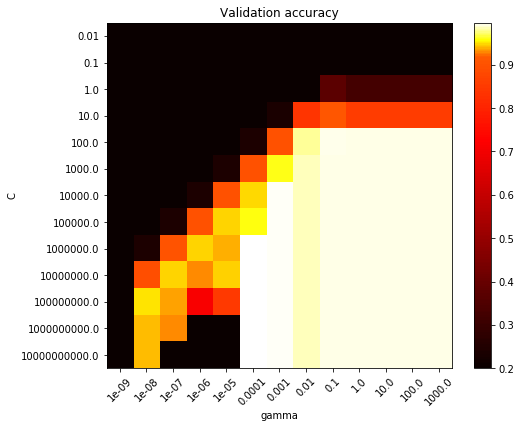

In [282]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

X = ba_X
y = ba_y

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=4)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)


scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

Automatically created module for IPython interactive environment
The best parameters are {'C': 1000000.0, 'gamma': 0.00012105263157894738} with a score of 1.00


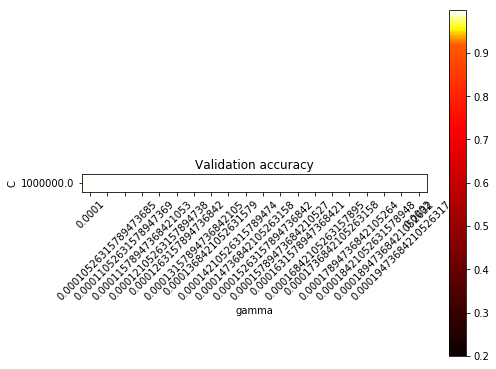

In [300]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

X = ba_X
y = ba_y

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(6, 6, 1)
# gamma_range = np.logspace(-5, -3, 16)
gamma_range = np.linspace(1e-4, 2e-4, 20)
param_grid = dict(gamma=gamma_range, C=C_range)
# cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVR(), param_grid=param_grid, cv=8)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)


scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [286]:
grid.support_vectors_

AttributeError: 'GridSearchCV' object has no attribute 'support_vectors_'

Automatically created module for IPython interactive environment
The best parameters are {'C': 1.0, 'gamma': 0.1} with a score of 0.97


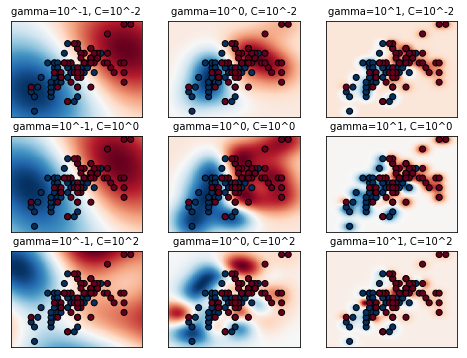

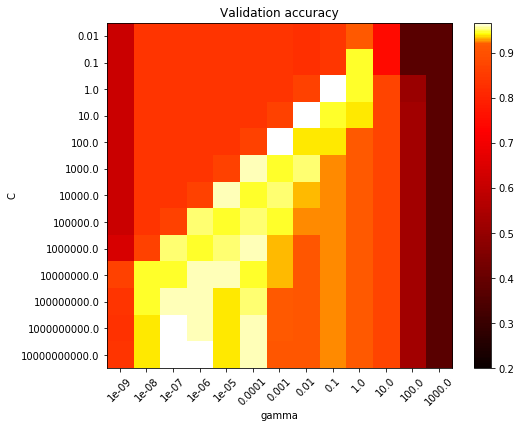

In [239]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV


# Utility function to move the midpoint of a colormap to be around
# the values of interest.

class MidpointNormalize(Normalize):

    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y))

# #############################################################################
# Load and prepare data set
#
# dataset for grid search

iris = load_iris()
X = iris.data
y = iris.target

# Dataset for decision function visualization: we only keep the first two
# features in X and sub-sample the dataset to keep only 2 classes and
# make it a binary classification problem.

X_2d = X[:, :2]
X_2d = X_2d[y > 0]
y_2d = y[y > 0]
y_2d -= 1

# It is usually a good idea to scale the data for SVM training.
# We are cheating a bit in this example in scaling all of the data,
# instead of fitting the transformation on the training set and
# just applying it on the test set.

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_2d = scaler.fit_transform(X_2d)

# #############################################################################
# Train classifiers
#
# For an initial search, a logarithmic grid with basis
# 10 is often helpful. Using a basis of 2, a finer
# tuning can be achieved but at a much higher cost.

C_range = np.logspace(-2, 10, 13)
gamma_range = np.logspace(-9, 3, 13)
param_grid = dict(gamma=gamma_range, C=C_range)
cv = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=42)
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=cv)
grid.fit(X, y)

print("The best parameters are %s with a score of %0.2f"
      % (grid.best_params_, grid.best_score_))

# Now we need to fit a classifier for all parameters in the 2d version
# (we use a smaller set of parameters here because it takes a while to train)

C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        clf = SVC(C=C, gamma=gamma)
        clf.fit(X_2d, y_2d)
        classifiers.append((C, gamma, clf))

# #############################################################################
# Visualization
#
# draw visualization of parameter effects

plt.figure(figsize=(8, 6))
xx, yy = np.meshgrid(np.linspace(-3, 3, 200), np.linspace(-3, 3, 200))
for (k, (C, gamma, clf)) in enumerate(classifiers):
    # evaluate decision function in a grid
    Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # visualize decision function for these parameters
    plt.subplot(len(C_2d_range), len(gamma_2d_range), k + 1)
    plt.title("gamma=10^%d, C=10^%d" % (np.log10(gamma), np.log10(C)),
              size='medium')

    # visualize parameter's effect on decision function
    plt.pcolormesh(xx, yy, -Z, cmap=plt.cm.RdBu)
    plt.scatter(X_2d[:, 0], X_2d[:, 1], c=y_2d, cmap=plt.cm.RdBu_r,
                edgecolors='k')
    plt.xticks(())
    plt.yticks(())
    plt.axis('tight')

scores = grid.cv_results_['mean_test_score'].reshape(len(C_range),
                                                     len(gamma_range))

# Draw heatmap of the validation accuracy as a function of gamma and C
#
# The score are encoded as colors with the hot colormap which varies from dark
# red to bright yellow. As the most interesting scores are all located in the
# 0.92 to 0.97 range we use a custom normalizer to set the mid-point to 0.92 so
# as to make it easier to visualize the small variations of score values in the
# interesting range while not brutally collapsing all the low score values to
# the same color.

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
plt.imshow(scores, interpolation='nearest', cmap=plt.cm.hot,
           norm=MidpointNormalize(vmin=0.2, midpoint=0.92))
plt.xlabel('gamma')
plt.ylabel('C')
plt.colorbar()
plt.xticks(np.arange(len(gamma_range)), gamma_range, rotation=45)
plt.yticks(np.arange(len(C_range)), C_range)
plt.title('Validation accuracy')
plt.show()

In [280]:
X.shape

(800, 11)

In [243]:
for (k, (C, gamma, clf)) in enumerate(classifiers):
    print((k, C, gamma, clf))

(0, 0.01, 0.1, SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))
(1, 0.01, 1, SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))
(2, 0.01, 10.0, SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=10.0, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))
(3, 1, 0.1, SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))
(4, 1, 1, SVC(C=1, cache_size=200, class_weight=None

In [267]:
classifiers.__len__()

9

In [247]:
X_2d.shape

(100, 2)

In [249]:
y_2d.shape

(100,)

In [250]:
np.c_

In [251]:
xx.shape

(200, 200)

In [254]:
xx.ravel().shape

(40000,)

In [255]:
yy.ravel().shape

(40000,)

In [256]:
Z.shape

(200, 200)

In [259]:
t = np.c_[xx.ravel(), yy.ravel()]

In [260]:
t.shape

(40000, 2)

In [268]:
scores.shape

(13, 13)

In [270]:
scores[1,:]

array([0.61333333, 0.84      , 0.84      , 0.84      , 0.84      ,
       0.84      , 0.84      , 0.82666667, 0.84666667, 0.94666667,
       0.74666667, 0.37333333, 0.37333333])

In [271]:
scores[12,:]

array([0.84      , 0.94      , 0.96666667, 0.96666667, 0.94      ,
       0.96      , 0.91333333, 0.91333333, 0.92666667, 0.92      ,
       0.87333333, 0.52666667, 0.37333333])

In [274]:
scores[4,:]

array([0.61333333, 0.84      , 0.84      , 0.84      , 0.84      ,
       0.86666667, 0.96666667, 0.94      , 0.94      , 0.92      ,
       0.87333333, 0.52666667, 0.37333333])